# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
# %matplotlib notebook

In [2]:
sinasc = pd.read_csv('SINASC.csv')
sinasc

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
sinasc.loc[sinasc['APGAR5'] <= 3, 'cat_apgar5'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <= 5), 'cat_apgar5'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <= 7), 'cat_apgar5'] = 'asfixia leve'
sinasc.loc[sinasc['APGAR5'] >= 8, 'cat_apgar5'] = 'normal'
sinasc['cat_apgar5'].value_counts()

normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: cat_apgar5, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [4]:
sinasc['GESTACAO'].unique()

array(['37 a 41 semanas', '42 semanas e mais', '32 a 36 semanas',
       '22 a 27 semanas', '28 a 31 semanas', nan, 'Menos de 22 semanas'],
      dtype=object)

<AxesSubplot:xlabel='SEXO', ylabel='count'>

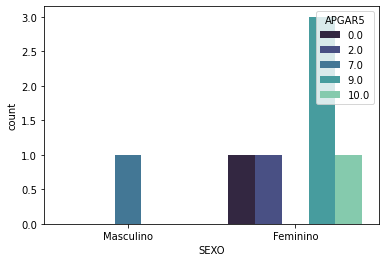

In [5]:
# Menos de 22 semanas
sns.countplot(x= 'SEXO'
              , hue = 'APGAR5'
              , data= sinasc.loc[sinasc['GESTACAO'] == 'Menos de 22 semanas']
              , palette = 'mako'
             )

<AxesSubplot:xlabel='SEXO', ylabel='count'>

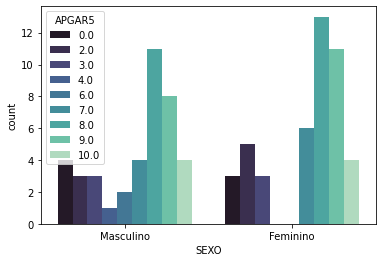

In [6]:
# 22 a 27 semanas
sns.countplot(x= 'SEXO'
              , hue = 'APGAR5'
              , data= sinasc.loc[sinasc['GESTACAO'] == '22 a 27 semanas']
              , palette = 'mako'
             )

<AxesSubplot:xlabel='SEXO', ylabel='count'>

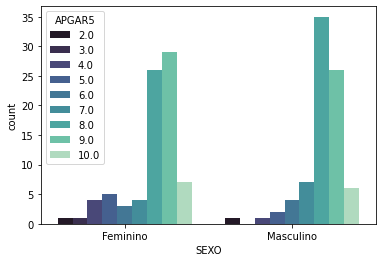

In [7]:
# 28 a 31 semanas
sns.countplot(x= 'SEXO'
              , hue = 'APGAR5'
              , data= sinasc.loc[sinasc['GESTACAO'] == '28 a 31 semanas']
              , palette = 'mako'
             )

<AxesSubplot:xlabel='SEXO', ylabel='count'>

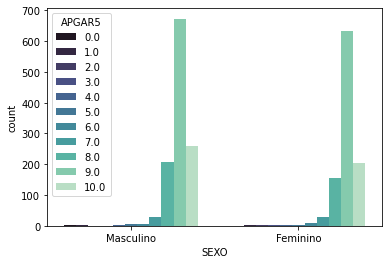

In [8]:
# 32 a 36 semanas
sns.countplot(x= 'SEXO'
              , hue = 'APGAR5'
              , data= sinasc.loc[sinasc['GESTACAO'] == '32 a 36 semanas']
              , palette = 'mako'
             )

<AxesSubplot:xlabel='SEXO', ylabel='count'>

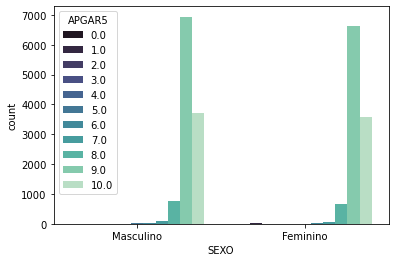

In [9]:
# 37 a 41 semanas
sns.countplot(x= 'SEXO'
              , hue = 'APGAR5'
              , data= sinasc.loc[sinasc['GESTACAO'] == '37 a 41 semanas']
              , palette = 'mako'
             )

<AxesSubplot:xlabel='SEXO', ylabel='count'>

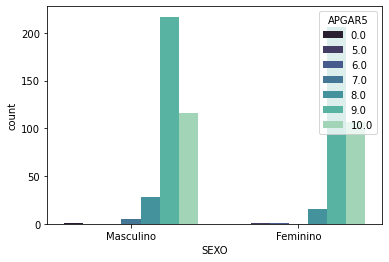

In [10]:
# 42 semanas e mais
sns.countplot(x= 'SEXO'
              , hue = 'APGAR5'
              , data= sinasc.loc[sinasc['GESTACAO'] == '42 semanas e mais']
              , palette = 'mako'
             )

<AxesSubplot:xlabel='gestacao', ylabel='APGAR5'>

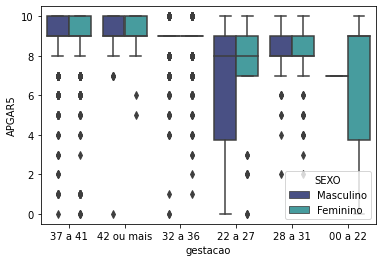

In [11]:
# Outra Resolução
dic = {'42 semanas e mais' : '42 ou mais', '37 a 41 semanas'     : '37 a 41', 
       '32 a 36 semanas'   : '32 a 36',    '28 a 31 semanas'     : '28 a 31',
       '22 a 27 semanas'   : '22 a 27',    'Menos de 22 semanas' : '00 a 22'}

sinasc['gestacao'] = sinasc[['GESTACAO']].replace({'GESTACAO' : dic})
sns.boxplot(data = sinasc, y = 'APGAR5', x = 'gestacao', hue = 'SEXO', palette = 'mako')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [12]:
apgar5_gest = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
apgar5_gest

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [13]:
apgar5_gest_pctlin = apgar5_gest.div(apgar5_gest.sum(axis = 1), axis = 0)
apgar5_gest_pctlin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

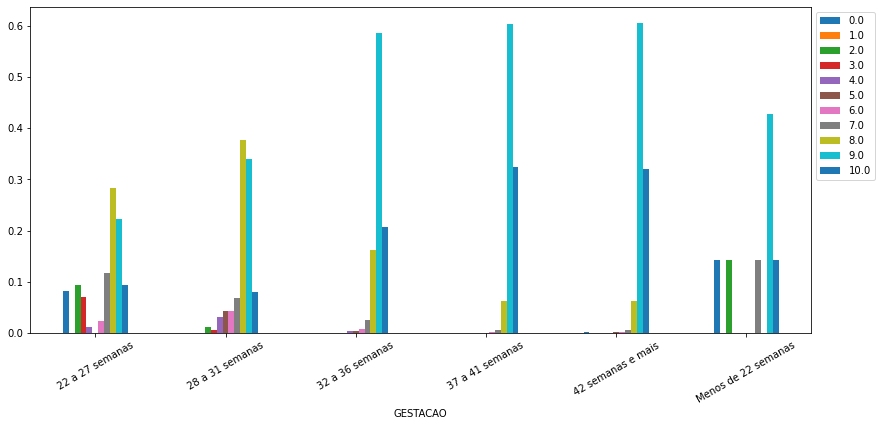

In [14]:
plt.rc('figure', figsize=(14, 6))
grafico = apgar5_gest_pctlin.plot.bar()
grafico.tick_params(axis="x", rotation = 30)
grafico.legend(loc='upper left', bbox_to_anchor=(1, 1))

- Este conjunto de dados corrobora com a classificação de um parto prematuro, uma vez que a incidência de baixas notas da variável 'APGAR5' aumenta a partir da classificação '32 a 36 semanas' da 'GESTACAO', porém a classe 'Menos de 22 semanas' apresenta um alto indíce de nota 9, apesar de representar um número de semanas que representa risco à gravidez. 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<AxesSubplot:xlabel='APGAR5', ylabel='PESO'>

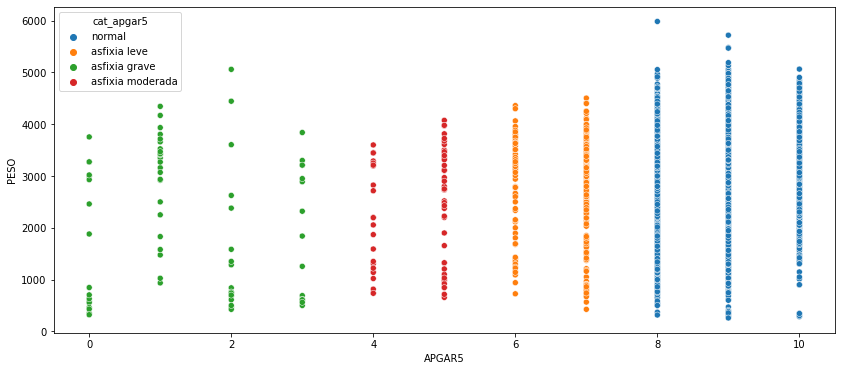

In [15]:
# Gráfico 1 -> Registros de PESO por nota do APGAR5 e separado pelas categorias
sns.scatterplot(data=sinasc, x="APGAR5", y="PESO", hue = 'cat_apgar5')

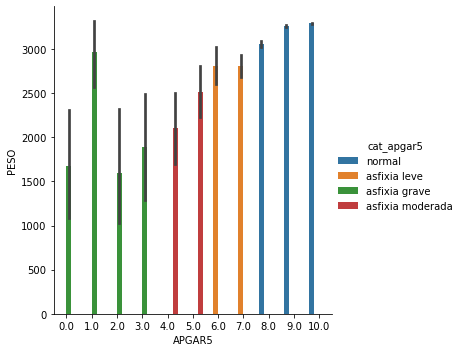

In [16]:
# Gráfico 2 -> Média de peso por nota do APGAR5 e separado pelas categorias
sns.catplot(x='APGAR5'
            , y='PESO'
            , kind='bar'
            , data=sinasc
            , hue = 'cat_apgar5'
           )

- De acordo com o segundo gráfico, podemos concluir que os bebês dentro das categorias 'Normal' e 'Asfixia Leve', seguindo a nota de APGAR5, apresentaram uma média de peso saudável, contrastando com o peso insuficiente apresentado pelas demais categorias de APGAR5. Entretanto, como observado no primeiro gráfico há uma dispersão grande dentre os dados de APGAR5 e seus respectivos pesos, uma vez que as categorias nas extremidades do gráfico apresentam uma grande amplitude na variável PESO.